In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
folder = os.path.join(os.getcwd(), 'data' + '\\')
df = pd.DataFrame(columns=['Company','Timestamp','Label','Headline'])
for i in os.scandir(folder):
    path = folder + i.name
    a = pd.read_csv(path,sep=',',names=['Company','Timestamp','Label','Headline'],skiprows=[0])
    df = pd.concat([df,a])

In [3]:
len(df)

16964

In [4]:
df.head()

,Company,Timestamp,Label,Headline
0,ABT,2020-10-09 06:14:00,0,Did You Participate In Any Of Abbott Laborator...
1,ABT,2020-10-08 22:15:00,0,13 Biggest Companies That Hire Felons Insider ...
2,ABT,2020-10-08 06:09:00,0,3 Safe Stocks to Buy in a Not-So-Safe Market M...
3,ABT,2020-10-07 17:03:00,0,Abbott Laboratories Says Its Rapid Coronavirus...
4,ABT,2020-10-07 15:28:00,0,AbbVie Is Undervalued and Offers a High Yield ...


In [5]:
df_x=df["Headline"]
df_y=df["Label"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [7]:
x_train.head()

149      Why Apple Did a 4-for-1 Stock Split Motley Fool
381    The Zacks Analyst Blog Highlights: Berkshire H...
52     Big tech blows a collective raspberry at the H...
138    Apple Readies Subscription Bundles to Boost Di...
370    INTC SHAREHOLDER DEADLINE: Bernstein Liebhard ...
Name: Headline, dtype: object

In [8]:
cv1 = CountVectorizer()

In [9]:
x_traincv=cv1.fit_transform(x_train)

In [10]:
a=x_traincv.toarray()
len(a)

13571

In [11]:
len(cv1.vocabulary_)

8131

In [12]:
a[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
cv1.inverse_transform(a[0])

[array(['apple', 'did', 'fool', 'for', 'motley', 'split', 'stock', 'why'],
       dtype='<U18')]

In [14]:
x_train.iloc[0]
x_train.head()

149      Why Apple Did a 4-for-1 Stock Split Motley Fool
381    The Zacks Analyst Blog Highlights: Berkshire H...
52     Big tech blows a collective raspberry at the H...
138    Apple Readies Subscription Bundles to Boost Di...
370    INTC SHAREHOLDER DEADLINE: Bernstein Liebhard ...
Name: Headline, dtype: object

In [15]:
x_testcv=cv1.transform(x_test)

In [16]:
x_testcv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
 mcl = MLPClassifier()
 y_train.head()

149    0
381    1
52     1
138    0
370    0
Name: Label, dtype: object

In [18]:
y_train=y_train.astype('int')

In [19]:
y_train

149    0
381    1
52     1
138    0
370    0
      ..
162    1
201    0
269    0
44     1
93     0
Name: Label, Length: 13571, dtype: int32

In [20]:
mcl.fit(x_traincv,y_train)

MLPClassifier()

In [21]:
testmessage=x_test.iloc[0]

In [22]:
predictions=mcl.predict(x_testcv)

In [23]:
predictions

array([ 0,  0,  0, ..., -1,  0,  0])

In [24]:
z = 0
o = 0
m = 0
for i in predictions:
    if i == 0:
        z += 1
    elif i == -1:
        m += 1
    else:
        o += 1
print(o)
print(z)
print(m)
        


729
2264
400


In [25]:
a=np.array(y_test)

In [26]:
a

array([0, -1, 0, ..., -1, 0, 1], dtype=object)

In [27]:
count=0

In [28]:
for i in range (len(predictions)):
    if predictions[i]==a[i]:
        count=count+1

In [29]:
count

2751

In [30]:
len(predictions)

3393

In [31]:
2752/3393

0.8110816386678456

In [32]:
x_test1 = cv1.transform(x_test)
x_test1.toarray()
y_pred = mcl.predict(x_test1)
np.ravel(y_pred)
np.ravel(y_test)
y_pred = y_pred.tolist()
y_test = y_test.tolist()
accuracy_score(y_test,y_pred)

0.8107869142351901

In [33]:
f1_score(y_pred,y_test, average = 'weighted')

0.8134194852517262

In [34]:
precision_score(y_pred,y_test, average = 'weighted')

0.8178577454924674

In [35]:
recall_score(y_pred,y_test, average = 'weighted',zero_division=1)

0.8107869142351901

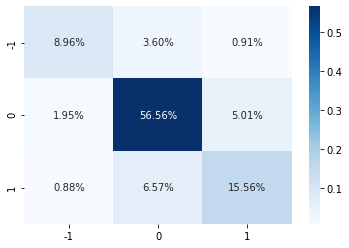

In [38]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues',xticklabels = [-1,0,1], yticklabels = [-1,0,1])
plt.savefig("NN_heatmap.png")

<Figure size 432x288 with 0 Axes>